1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!): ---> ie the most likely (smooth) PDF from which all samples have been drawn:

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns

In [2]:
rng=np.random.default_rng()
x=rng.normal(loc=5.,scale=1.5, size=100)

* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)

* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.

* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained

* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method

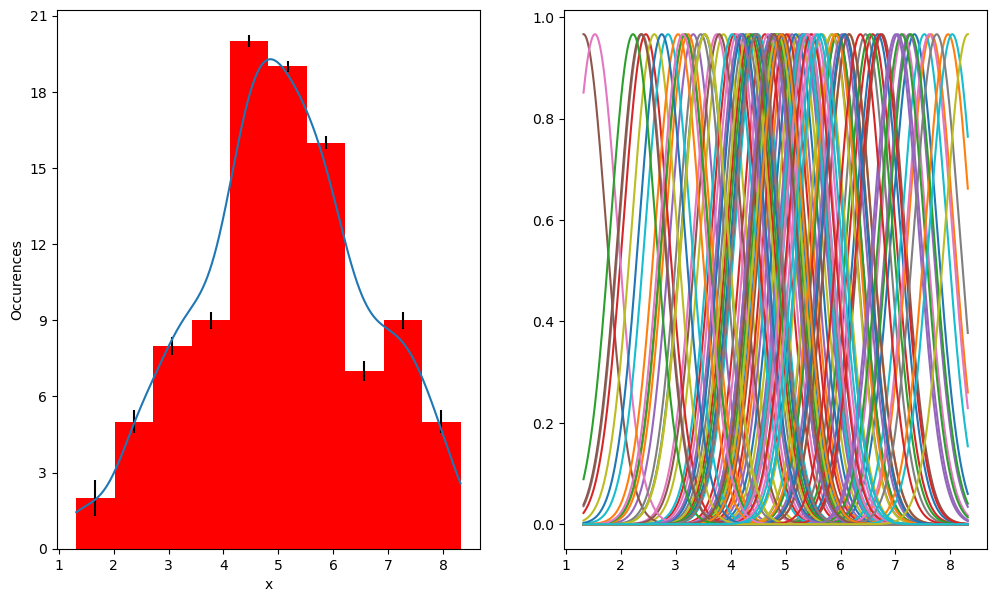

In [3]:
# 1- larger after 2? 
N_bins=10
bin_width=(x.max()-x.min())/N_bins
y, bin_edges = np.histogram(x,bins=N_bins) # ---> NB have to use numpy bc yerr depends on bin content
#print(bin_edges)
#print(y)
# 2-
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
ax1.set_ylabel("Occurences")
ax1.set_xlabel("x")
# 3-
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True)) # ---> NB this (was there easier way?)
# 4- 
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1]) # ---> average
#print(bin_centers)
poisson_unc = 1/np.sqrt(y)
ax1.bar(bin_centers, y, width=bin_width, color='r', yerr=poisson_unc) # ---> NB this (easier way?)

default_sigma=1.06*x.std()*x.size**(-0.2)
N_steps=1000
lin=np.linspace(x.min(), x.max(), N_steps)
g_sum=np.zeros(N_steps)
for xi in x:
    gaussian_object=sp.stats.norm(loc=xi, scale=default_sigma**2) # ---> check if scale is really squared?
    gaussian_pdf=gaussian_object.pdf(lin)
    ax2.plot(lin, gaussian_pdf)
    g_sum=g_sum + gaussian_pdf # ---> should be with np.sum() as assigned?
x_separation=(x.max()-x.min())/N_steps
total_pdf_area=sp.integrate.trapezoid(g_sum,dx=x_separation)
total_histo_area=np.sum(bin_width*y)
norm_const=total_histo_area/total_pdf_area
#print(total_histo_area,total_pdf_area)
ax1.plot(lin, norm_const*g_sum)
plt.show()
# ---> TODO: fix divide by zero warning in sqrt(y), add legend ?
# ---> how to avoid "overfitting"?

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2026-01-15 22:20:46--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/70o67xqfkicx6o3pofl37/two_categories_scatter_plot.png?rlkey=b1wnq5kkwhthz0cevmq0mxf35 [following]
--2026-01-15 22:20:46--  https://www.dropbox.com/scl/fi/70o67xqfkicx6o3pofl37/two_categories_scatter_plot.png?rlkey=b1wnq5kkwhthz0cevmq0mxf35
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc87b0e6b26f44da945f33bc316a.dl.dropboxusercontent.com/cd/0/inline/C5B0tarU37OAJWPJlkDTbXCOc3QpBmyFORkKQQF70FFcMRWPxub6-Sent2mqSpf8D4isZh_GOkQDOVnj6ZUS31M_q7ObITbnochQWjuWhEnRqdqwj5UM93W5qWU5GEOu46Y/file# [following]
--2026-01-15 22:20:47--  https://uc87b0e6b26f44da945f33bc316a.dl.dropboxusercontent.com/cd/

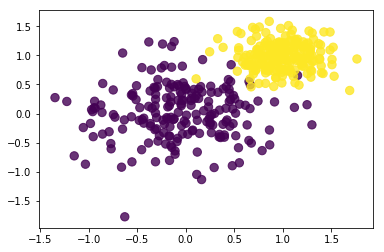

In [4]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

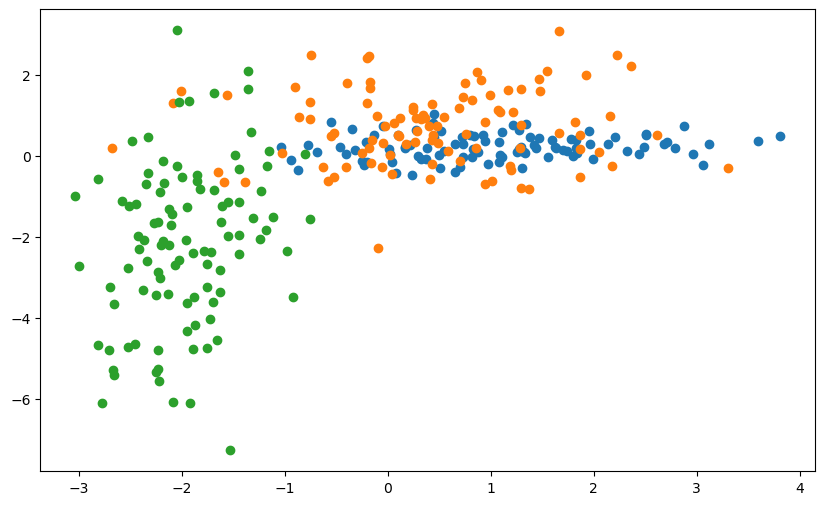

In [5]:
n_cats=3
def n_cathegory_generator(n:int, means_array:np.ndarray, std_array:np.ndarray, N_points:int):
    assert (np.size(means_array) == 2*n) and (np.size(std_array) == 2*n)
    data_matrix=np.zeros((n, N_points, 2))
    for i in range(n):
        x_data=rng.normal(means_array[0,i], std_array[0,i], N_points) # ---> NB a 1D array
        y_data=rng.normal(means_array[1,i], std_array[1,i], N_points)
        data_matrix[i,:,0]=x_data
        data_matrix[i,:,1]=y_data
    return data_matrix

mydata=n_cathegory_generator(n_cats, N_points=100, means_array=np.array([[1,0.5,-2],[0.2,0.8,-2]]),
                             std_array=np.array([[1,1,0.5],[0.3,1,2]]))
fig,ax=plt.subplots(figsize=(10, 6))
for i in range(n_cats):
    ax.scatter(x=mydata[i,:,0], y=mydata[i,:,1])
# ---> TODO: make sure markers are diff colors? is there an already implemented 2D gaussian?

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2

In [6]:
path=r"\\wsl.localhost\Ubuntu\home\user\labcomput\data"
!path=r"\\wsl.localhost\Ubuntu\home\user\labcomput\data"
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy -P $path 

--2026-01-15 22:20:50--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/cu0wjpyhyoy57w9yupavt/residuals_261.npy?rlkey=9rx6zjagfspm9mfc1jc3zejbt [following]
--2026-01-15 22:20:51--  https://www.dropbox.com/scl/fi/cu0wjpyhyoy57w9yupavt/residuals_261.npy?rlkey=9rx6zjagfspm9mfc1jc3zejbt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc775d51b21e6d7b00002aa77bf1.dl.dropboxusercontent.com/cd/0/inline/C5DAVltfcK2S7FxYapgEMsyKKPDyMlEohYCVN4pLCdMxMagaaA5tv5Hr5W8voKWbFkZtzMSaUnmra55mHF5WpLgHTAJTKxJViROBSpxWaCzJ4UD1XGSjSsNnTldHozLB4As/file# [following]
--2026-01-15 22:20:52--  https://uc775d51b21e6d7b00002aa77bf1.dl.dropboxusercontent.com/cd/0/inline/C5DAVltfcK2S7FxYapgEMsyKKPDyMlEoh

In [7]:
full_path = path + r"\residuals_261.npy"
# ---> Nb these two lines:
array = np.load(full_path, allow_pickle=True)
df = pd.DataFrame(array.item()) 
print(df.head())
cleaned_df=df[abs(df['residuals'])<2]
print(cleaned_df.head())

   residuals  distances
0       1.10       16.0
1      -1.95        6.3
2      -7.20        3.4
3      -4.15        8.4
4      -6.59        1.7
    residuals  distances
0    1.100000       16.0
1   -1.950000        6.3
8   -0.042857        3.3
9    0.128571        5.3
10   0.085714       15.0


* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 

* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

0.577913366635926 10.025258299436526


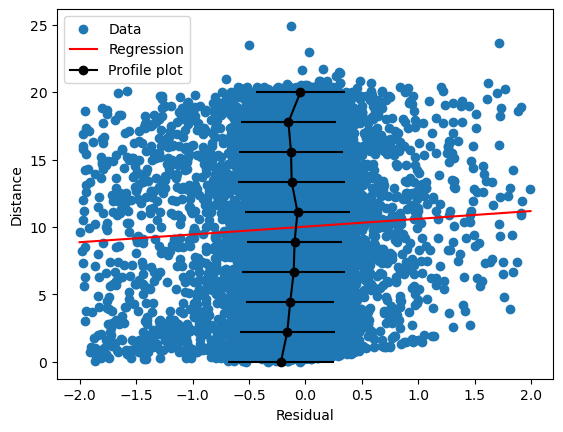

In [44]:
x_data=np.asarray(cleaned_df['residuals'])
y_data=np.asarray(cleaned_df['distances'])
#print(x_data.shape, type(x_data))
regression_object=sp.stats.linregress(x=x_data, y=y_data)
fig, ax=plt.subplots()
ax.set_xlabel("Residual")
ax.set_ylabel("Distance")
ax.scatter(x=x_data, y=y_data, label="Data")
lin=np.linspace(x_data.min(), x_data.max(), 1000)
slope=regression_object.slope
intercept=regression_object.intercept
ax.plot(lin, slope * lin + intercept, color='r', label="Regression")
print(slope,intercept)

# ---> let's try to create it by hand
# ---> NB THIS is the correct meaning of "profile plot":
#      A profile plot displays the mean (or median) of a dependent variable binned by an independent variable
def make_profile_plot(N_bins:int, start:int, stop:int, X_data:np.ndarray, Y_data:np.ndarray, ax):
    # ---> must provide an ax
    bin_width=(stop-start)/N_bins
    #print(bin_width)
    bin_centers=np.linspace(start,stop,N_bins) # ---> "x"
    data_in_bins=[[] for i in range(N_bins)] # ---> NB this ("y")
    for j in range(len(Y_data)):
        distance=np.abs(X_data[j]-bin_centers) # ---> correctly uses broadcasting
        assigned_bin_idx=np.argmin(distance) # ---> if equidistant, choice is arbitrary (see docs?)
        data_in_bins[assigned_bin_idx].append(Y_data[j])
    means=[np.mean(binned_data) for binned_data in data_in_bins]
    errors=[np.std(binned_data) for binned_data in data_in_bins] # ---> NB the sqrt
    ax.errorbar(means, bin_centers, xerr=errors, fmt='o-', color='k', ecolor='k', label="Profile plot")
make_profile_plot(10, 0, 20, y_data, x_data, ax=ax)
plt.legend()
plt.show()

* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot

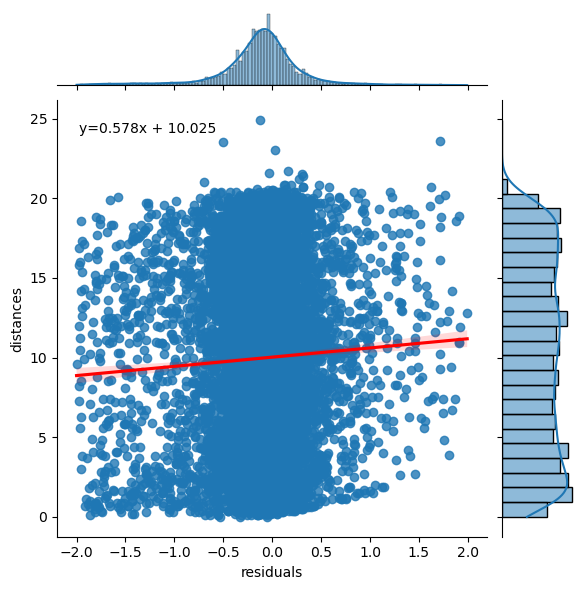

In [46]:
g = sns.jointplot(data=cleaned_df, x="residuals", y="distances", kind="reg", line_kws={'color': 'red'})
# ---> NB the color thingy
# ---> NB this:
#ax = g.ax_joint
line = g.ax_joint.get_lines()[0] 
x_line, y_line = line.get_data()
slope = (y_line[-1] - y_line[0]) / (x_line[-1] - x_line[0])
intercept = y_line[0] - slope * x_line[0]
text = f"y={slope:.3f}x + {intercept:.3f}"
g.ax_joint.text(0.05, 0.95, text, transform=g.ax_joint.transAxes, verticalalignment='top')
plt.show()
#print(slope,intercept)
# ---> how to plot legend and change labels?